In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

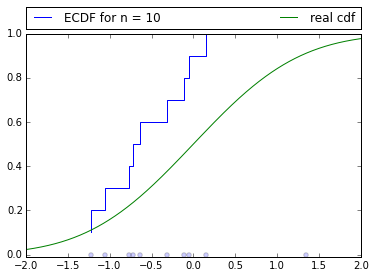

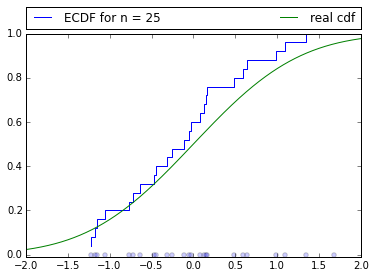

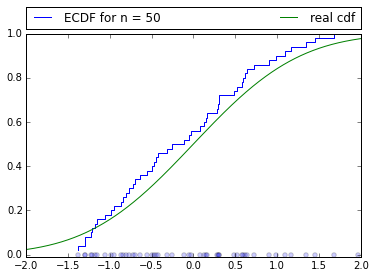

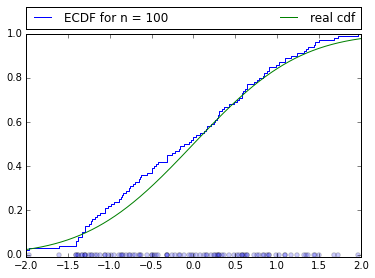

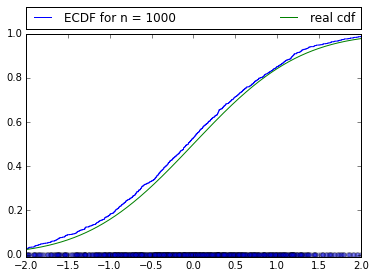

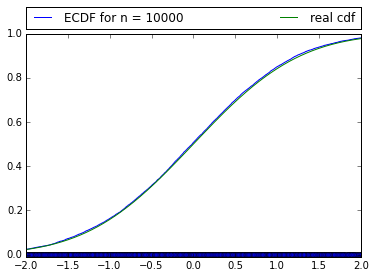

(0, 0.2)

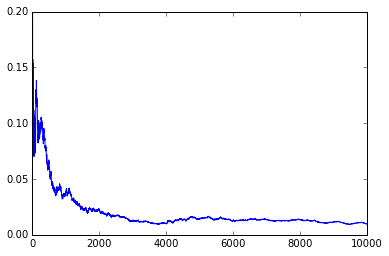

In [45]:
distr = sts.norm(0, 1)
N = 10000
bigSample = distr.rvs(N)
numbers = np.arange(1, N+1)
X = np.arange(-2, 2, 0.001)

from statsmodels.distributions.empirical_distribution import ECDF

Dn = np.array([])

for n in numbers:
    sample = bigSample[:n]
    ecdf = ECDF(sample)
    npa = abs(ecdf.y - distr.cdf(ecdf.x))
    Dn = np.append(Dn, npa.max())
    if n in [10,25,50,100,1000,N]:
        plt.step(ecdf.x, ecdf.y, label='ECDF for n = '+str(n))  
        yzeros = np.array([0]*n)
        plt.scatter(sample, yzeros, marker='o', alpha=.2)
        plt.plot(X, distr.cdf(X), label='real cdf')
        plt.xlim(-2,2)
        plt.ylim(-.01, 1)
        plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.)
        plt.show()
            
plt.plot(numbers, Dn)
plt.ylim(0, .2)
